In [25]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

boston = pd.read_csv('BostonHousing.csv')
print(boston.head())

      crim    zn  indus  chas    nox     rm   age     dis  rad  tax  ptratio  \
0  0.00632  18.0   2.31     0  0.538  6.575  65.2  4.0900    1  296     15.3   
1  0.02731   0.0   7.07     0  0.469  6.421  78.9  4.9671    2  242     17.8   
2  0.02729   0.0   7.07     0  0.469  7.185  61.1  4.9671    2  242     17.8   
3  0.03237   0.0   2.18     0  0.458  6.998  45.8  6.0622    3  222     18.7   
4  0.06905   0.0   2.18     0  0.458  7.147  54.2  6.0622    3  222     18.7   

        b  lstat  medv  
0  396.90   4.98  24.0  
1  396.90   9.14  21.6  
2  392.83   4.03  34.7  
3  394.63   2.94  33.4  
4  396.90   5.33  36.2  


In [26]:
# Print the dimensions of X and y before reshaping

print("Dimensions of y before reshaping: {}".format(y.shape))
print("Dimensions of X before reshaping: {}".format(X.shape))

Dimensions of y before reshaping: (506,)
Dimensions of X before reshaping: (506, 13)


In [27]:
#Creating Features and Target Arrays

X = boston.drop('medv', axis=1).values
y = boston['medv'].values

In [28]:
# Print the dimensions of X and y after reshaping
print("Dimensions of y after reshaping: {}".format(y.shape))
print("Dimensions of X after reshaping: {}".format(X.shape))

Dimensions of y after reshaping: (506,)
Dimensions of X after reshaping: (506, 13)


In [21]:
#Reshaping Arrays

# Print the dimensions of X and y before reshaping

#print("Dimensions of y before reshaping: {}".format(y.shape))
#print("Dimensions of X before reshaping: {}".format(X.shape))

# Reshape X and y
#y = y.reshape(-1, 1)
#X = X.reshape(-1, 1)

# Print the dimensions of X and y after reshaping
#print("Dimensions of y after reshaping: {}".format(y.shape))
#print("Dimensions of X after reshaping: {}".format(X.shape))

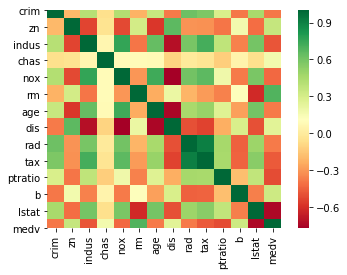

In [22]:
#Visual EDA - Correlation Heatmap

sns.heatmap(boston.corr(), square=True, cmap='RdYlGn')

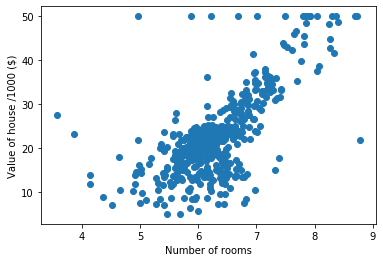

In [23]:
# medv vs rm
plt.scatter(boston['rm'], boston['medv'])
plt.ylabel('Value of house /1000 ($)')
plt.xlabel('Number of rooms')
plt.show();

In [30]:
# Linear Regression with all features
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size = 0.3, random_state=42)
reg_all = LinearRegression()
reg_all.fit(X_train, y_train)
y_pred = reg_all.predict(X_test)
reg_all.score(X_test, y_test)
print("R^2: {}".format(reg_all.score(X_test, y_test)))

R^2: 0.7112260057484936


In [31]:
#Cross Validation
#By default, scikit-learn's cross_val_score() function uses R2 as the metric of choice for regression. 
#Since you are performing 5-fold cross-validation, the function will return 5 scores. 

from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression
reg = LinearRegression()
cv_results = cross_val_score(reg, X, y, cv=5)
print(cv_results)

[ 0.63919994  0.71386698  0.58702344  0.07923081 -0.25294154]


In [33]:
np.mean(cv_results)

0.35327592439588185

In [35]:
print("Average 5-Fold CV Score: {}".format(np.mean(cv_results)))

Average 5-Fold CV Score: 0.35327592439588185


In [38]:
#k-Fold CV Comparison - Computational Expense

# Perform 3-fold CV
%timeit cvscores_3 =  cross_val_score(reg, X, y, cv = 3)
print(np.mean(cvscores_3))

# Perform 10-fold CV
%timeit cvscores_10 = cross_val_score(reg, X, y, cv = 10)
print(np.mean(cvscores_10))

8.33 ms ± 349 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)
-1.5841985220997958
25.2 ms ± 2.13 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)
0.20252899006055886


# Regularized Regression

In [39]:
#Ridge Regression
from sklearn.linear_model import Ridge
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=42)
ridge = Ridge(alpha=0.1, normalize=True)
ridge.fit(X_train, y_train)
ridge_pred = ridge.predict(X_test)
ridge.score(X_test, y_test)

0.6996938275127315

In [40]:
#Lasso Regression
from sklearn.linear_model import Lasso
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=42)
lasso = Lasso(alpha=0.1, normalize=True)
lasso.fit(X_train, y_train)
lasso_pred = lasso.predict(X_test)
lasso.score(X_test, y_test)

0.595022953532855

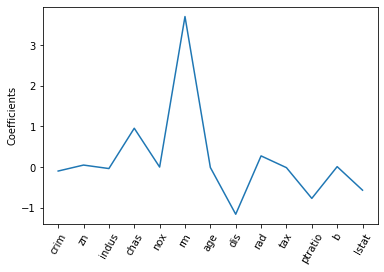

In [42]:
#Lasso for feature selection

from sklearn.linear_model import Lasso
names = boston.drop('medv', axis=1).columns
lasso = Lasso(alpha=0.1)
lasso_coef = lasso.fit(X, y).coef_
_ = plt.plot(range(len(names)), lasso_coef)
_ = plt.xticks(range(len(names)), names, rotation=60)
_ = plt.ylabel('Coefficients')
plt.show()

In [46]:
# choosing alpha is important!!!
# see how alpha varies affect cv score

In [44]:
#plots the R2 score as well as standard error for each alpha
def display_plot(cv_scores, cv_scores_std):
    fig = plt.figure()
    ax = fig.add_subplot(1,1,1)
    ax.plot(alpha_space, cv_scores)

    std_error = cv_scores_std / np.sqrt(10)

    ax.fill_between(alpha_space, cv_scores + std_error, cv_scores - std_error, alpha=0.2)
    ax.set_ylabel('CV Score +/- Std Error')
    ax.set_xlabel('Alpha')
    ax.axhline(np.max(cv_scores), linestyle='--', color='.5')
    ax.set_xlim([alpha_space[0], alpha_space[-1]])
    ax.set_xscale('log')
    plt.show()

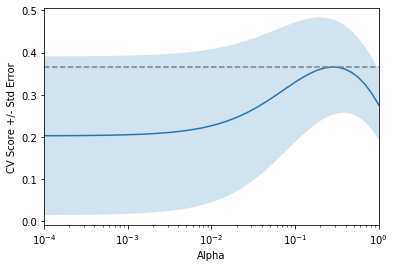

In [45]:
# Import necessary modules
from sklearn.linear_model import Ridge
from sklearn.model_selection import cross_val_score

# Setup the array of alphas and lists to store scores
alpha_space = np.logspace(-4, 0, 50)
ridge_scores = []
ridge_scores_std = []

# Create a ridge regressor: ridge
ridge = Ridge(normalize=True)

# Compute scores over range of alphas
for alpha in alpha_space:

    # Specify the alpha value to use: ridge.alpha
    ridge.alpha = alpha
    
    # Perform 10-fold CV: ridge_cv_scores
    ridge_cv_scores = cross_val_score(ridge, X, y, cv=10)
    
    # Append the mean of ridge_cv_scores to ridge_scores
    ridge_scores.append(np.mean(ridge_cv_scores))
    
    # Append the std of ridge_cv_scores to ridge_scores_std
    ridge_scores_std.append(np.std(ridge_cv_scores))

# Display the plot
display_plot(ridge_scores, ridge_scores_std)